In [1]:
from Bio import Entrez, SeqIO
import os , requests
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align.Applications import ClustalOmegaCommandline


C:\Users\user\anaconda3\envs\DS\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(
C:\Users\user\anaconda3\envs\DS\lib\site-packages\Bio\Application\__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


### Read BRCA1 sequence IDs from file with error handling

In [2]:

try:
    with open("BRCA1_seq_id.txt", "r") as file:
        BRCA1_ids = file.read().split()
except FileNotFoundError:
    print("The sequence ID file for BRCA1 was not found.")
    BRCA1_ids = []

def fetch_sequences(ids, filename):
    Entrez.email = "khaledmahmoud77@outlook.com"
    with open(filename, "w") as out_handle:
        for seq_id in ids:
            try:
                handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(handle, "fasta")
                SeqIO.write(seq_record, out_handle, "fasta")
                handle.close()
            except Exception as e:
                print(f"An error occurred while fetching sequence {seq_id}: {e}")

# Fetch BRCA1 sequences
fetch_sequences(BRCA1_ids, "BRCA1_sequences.fasta")

### Read BRCA2 sequence IDs from file with error handling

In [94]:
try:
    with open("BRCA2_seq_id.txt", "r") as file:
        BRCA2_ids = file.read().split()
except FileNotFoundError:
    print("The sequence ID file for BRCA2 was not found.")
    BRCA2_ids = []

# Reuse the fetch_sequences() function for BRCA2 sequences
fetch_sequences(BRCA2_ids, "BRCA2_sequences.fasta")

### Perform Pairwise Sequence Alignment for BRCA1

In [96]:
#Save the results of the Pairwise alignment in a text file

# Read sequences
sequences = list(SeqIO.parse("BRCA1_sequences.fasta", "fasta"))

# Open a file to save alignments
output_file = "pairwise_alignments_BRCA1.txt"
with open(output_file, "w") as f:
    f.write("Pairwise Comparisons for BRCA1 Sequences:\n\n")
    
    for i in range(len(sequences)):
        for j in range(i + 1, len(sequences)):
            alignments = pairwise2.align.globalxx(sequences[i].seq, sequences[j].seq)
            f.write(f"Alignment between {sequences[i].id} and {sequences[j].id}:\n")
            f.write(format_alignment(*alignments[0]))
            f.write("\n\n")

print(f"Pairwise alignments saved to {output_file}")

Pairwise alignments saved to pairwise_alignments_BRCA1.txt


### Perform Pairwise Sequence Alignment for BRCA2

In [95]:
#Save the results of the Pairwise alignment in a text file

# Read sequences
sequences = list(SeqIO.parse("BRCA2_sequences.fasta", "fasta"))

# Open a file to save alignments
output_file = "pairwise_alignments_BRCA2.txt"
with open(output_file, "w") as f:
    f.write("Pairwise Comparisons for BRCA2 Sequences:\n\n")
    
    for i in range(len(sequences)):
        for j in range(i + 1, len(sequences)):
            alignments = pairwise2.align.globalxx(sequences[i].seq, sequences[j].seq)
            f.write(f"Alignment between {sequences[i].id} and {sequences[j].id}:\n")
            f.write(format_alignment(*alignments[0]))
            f.write("\n\n")

print(f"Pairwise alignments saved to {output_file}")

Pairwise alignments saved to pairwise_alignments_BRCA2.txt


### Perform Multiple Sequence Alignment for BRCA1

In [97]:
# Define paths and filenames for MSA
clustalomega_exe = r"E:\Courses\Bioinformatics Diploma\Clustal Omega\clustal-omega-1.2.2-win64\clustalo.exe" #Change your Path Here
in_file = "BRCA1_sequences.fasta"
out_file = "BRCA1_MSA_sequences.fasta"

# Perform alignment using Clustal Omega
clustalomega_cline = ClustalOmegaCommandline(clustalomega_exe, infile=in_file, outfile=out_file, verbose=True, auto=True)
stdout, stderr = clustalomega_cline()

# Load the aligned sequences
aligned_sequences = AlignIO.read(out_file, "fasta")

# Print sequence IDs and lengths
print("\nBRCA1 Sequence IDs and Lengths:")
for record in aligned_sequences:
    print(f"Sequence ID: {record.id}, Length: {len(record.seq)}")

# Print the alignment
print("\nBRCA1 Multiple Sequence Alignment:")
print(aligned_sequences)


BRCA1 Sequence IDs and Lengths:
Sequence ID: AAC36493.1, Length: 1894
Sequence ID: AAC37594.1, Length: 1894
Sequence ID: AAC48663.1, Length: 1894
Sequence ID: AAR04849.1, Length: 1894
Sequence ID: AAD00168.1, Length: 1894
Sequence ID: sp|Q6J6I9.1|BRCA1_MACMU, Length: 1894
Sequence ID: CAH6776192.1, Length: 1894
Sequence ID: AAT44835.1, Length: 1894
Sequence ID: AAT44834.1, Length: 1894
Sequence ID: AAL76094.1, Length: 1894

BRCA1 Multiple Sequence Alignment:
Alignment with 10 rows and 1894 columns
MDLSAVRIQEVQNVLHAMQKILECPICLELIKEPVSTQCDHIFC...SND AAC36493.1
MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFC...--- AAC37594.1
MDLSADRVEEVQNVLNAMQKILECPICLELIKEPVSTKCDHIFC...V-- AAC48663.1
MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFC...--- AAR04849.1
MDLSAVQIQEVQNVLHAMQKILECPICLELIKEPVSTKCDHIFC...SND AAD00168.1
MDLSAVRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFC...--- sp|Q6J6I9.1|BRCA1_MACMU
MDLSPVQIEEVQNVLHAMQKILECPICLELIKEPISTKCDHIFC...PN- CAH6776192.1
MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFC...

### Perform Multiple Sequence Alignment for BRCA2

In [98]:
# Define paths and filenames for MSA
clustalomega_exe = r"E:\Courses\Bioinformatics Diploma\Clustal Omega\clustal-omega-1.2.2-win64\clustalo.exe" #Change your Path Here
in_file = "BRCA2_sequences.fasta"
out_file = "BRCA2_MSA_sequences.fasta"

# Perform alignment using Clustal Omega
clustalomega_cline = ClustalOmegaCommandline(clustalomega_exe, infile=in_file, outfile=out_file, verbose=True, auto=True)
stdout, stderr = clustalomega_cline()

# Load the aligned sequences
aligned_sequences = AlignIO.read(out_file, "fasta")

# Print sequence IDs and lengths
print("\nBRCA2 Sequence IDs and Lengths:")
for record in aligned_sequences:
    print(f"Sequence ID: {record.id}, Length: {len(record.seq)}")

# Print the alignment
print("\nBRCA2 Multiple Sequence Alignment:")
print(aligned_sequences)


BRCA2 Sequence IDs and Lengths:
Sequence ID: AAC23702.1, Length: 3528
Sequence ID: CAA64484.1, Length: 3528
Sequence ID: BAB91245.3, Length: 3528
Sequence ID: KAI6069156.1, Length: 3528
Sequence ID: KAI5760533.1, Length: 3528
Sequence ID: CAH7276384.1, Length: 3528
Sequence ID: AAB71378.1, Length: 3528
Sequence ID: NP_001009858.1, Length: 3528
Sequence ID: PNI60432.1, Length: 3528
Sequence ID: KAF6427219.1, Length: 3528

BRCA2 Multiple Sequence Alignment:
Alignment with 10 rows and 3528 columns
MPVEYKRRPTFWEIFKARCSTADLGPISLNWFEELSSEAPPYNF...--- AAC23702.1
MPIGSKERPTFFEIFKTRCNKADLGPISLNWFEELSSEAPPYNS...--- CAA64484.1
MPVGCKERPTFFEIFKTRCNQADLGPISLNWFEELSLEAPPYNS...TQK BAB91245.3
MPIGSKERPTFFEIFKTRCSKADLGPISLNWFEELSSEASLYNS...K-- KAI6069156.1
MPIGCKERPTFFEIFKTRCNEADLGPISLNWFEELSLEAPSYNS...--- KAI5760533.1
MPIGYKRRPTFFEIFKTRCSTADLGPISLNWFEELSSEAPPYDF...--- CAH7276384.1
MTVEYKRRPTFWEIFKARCSTADLGPISLNWFEELFSEAPPYNT...--- AAB71378.1
MPIGCKERPTFFEIFRTRCNKADLGPISLNWFEELCLEAPPYNS...QQT NP_00100

### Building a Phylogenetic Tree

In [99]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import matplotlib.pyplot as plt

BRCA1 Phylogenetic Tree:
  _ AAT44834.1
 |
 |  ___ sp|Q6J6I9.1|BRCA1_MACMU
 | |
 |_|            _________________ AAL76094.1
 | |          ,|
 | |          ||_______________ AAC48663.1
 | |__________|
 |            |                    _______________ CAH6776192.1
 |            |___________________|
 |                                |       ___________ AAD00168.1
 |                                |______|
 |                                       |__________ AAC36493.1
_|
 | AAC37594.1
 |
 | AAR04849.1
 |
 | AAT44835.1


BRCA2 Phylogenetic Tree:
                               ____________________________ CAH7276384.1
  ____________________________|
 |                            |             __________________ AAB71378.1
 |                            |____________|
 |                                         |_________________ AAC23702.1
 |
 |      __________________________________________ KAF6427219.1
 |  ___|
 | |   |         _________________________ NP_001009858.1
_| |   |________|


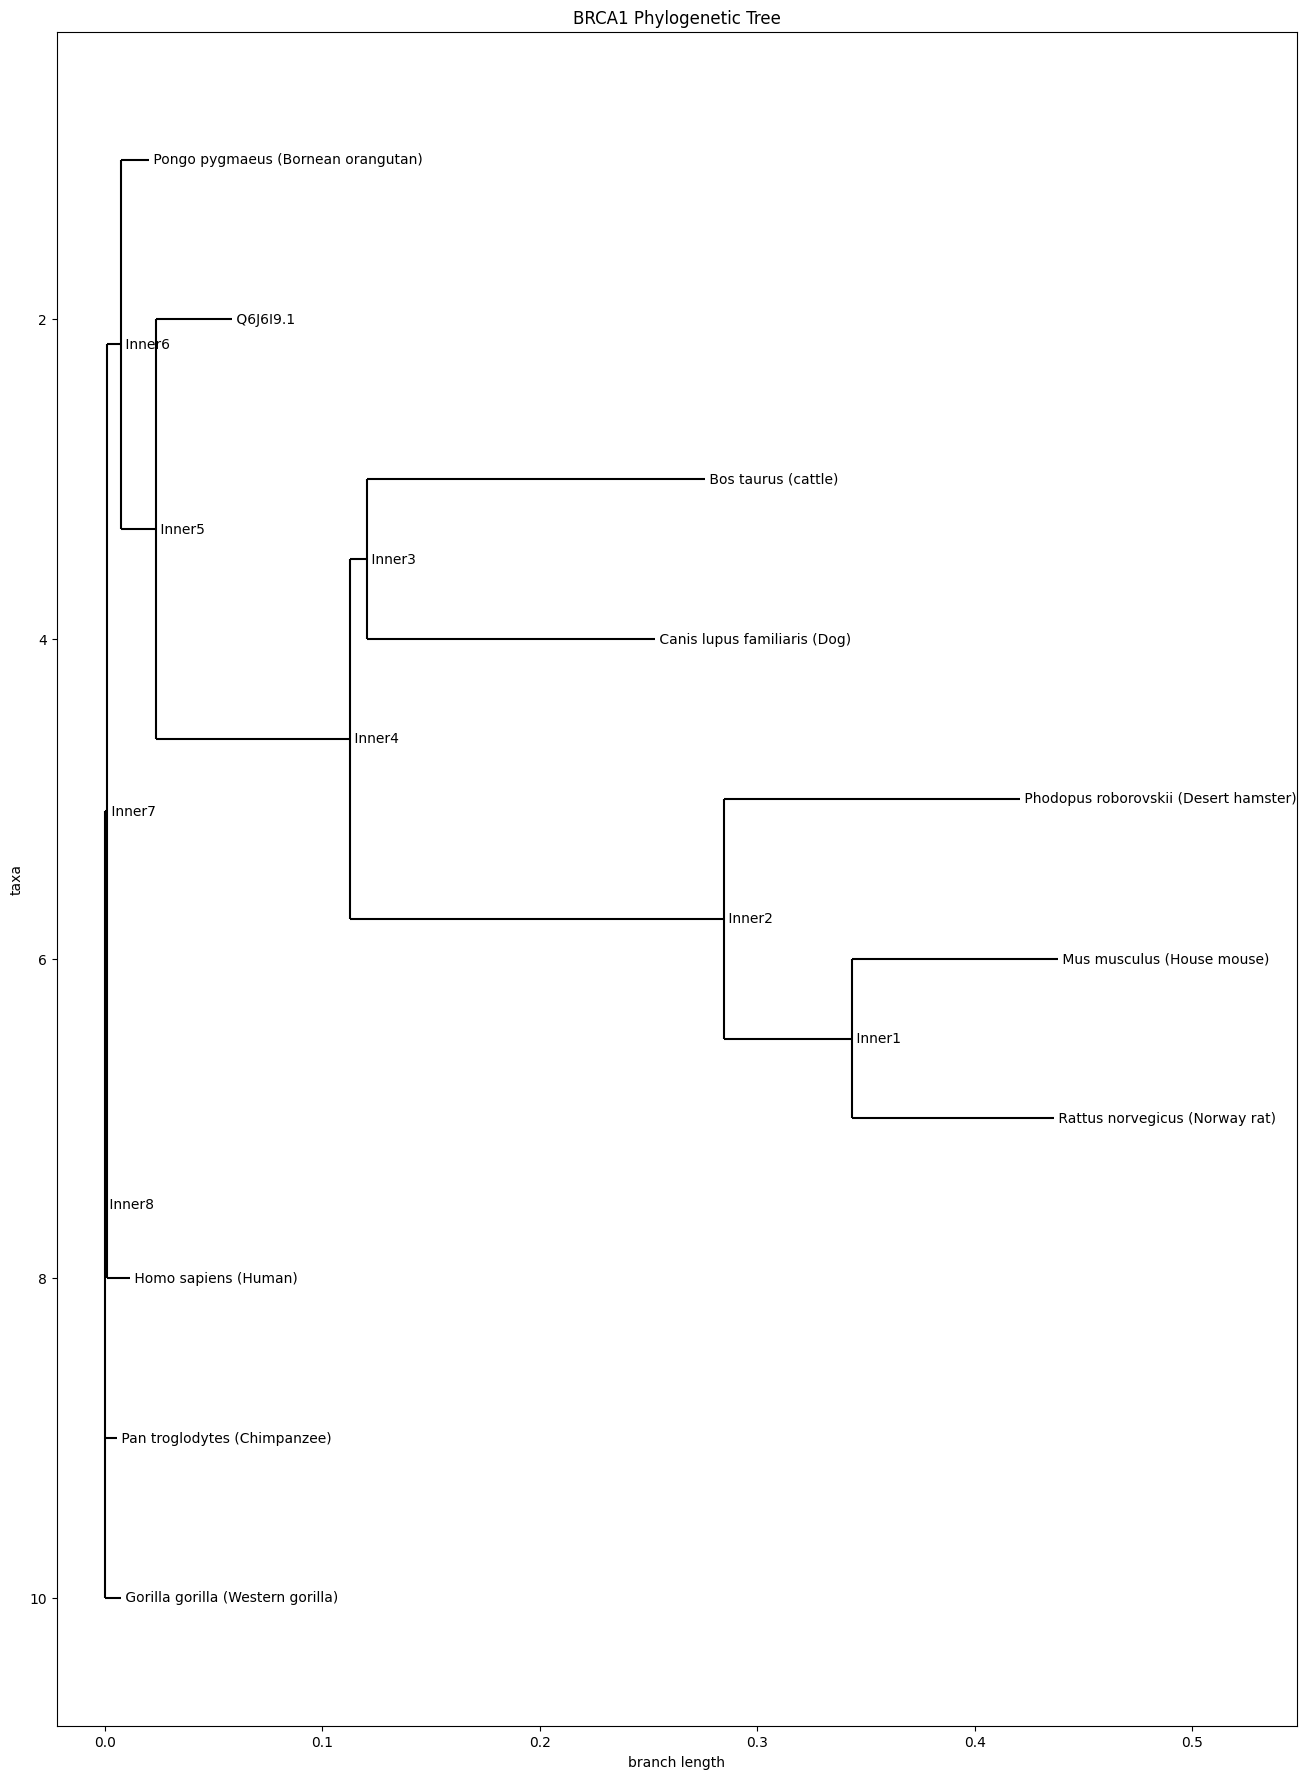

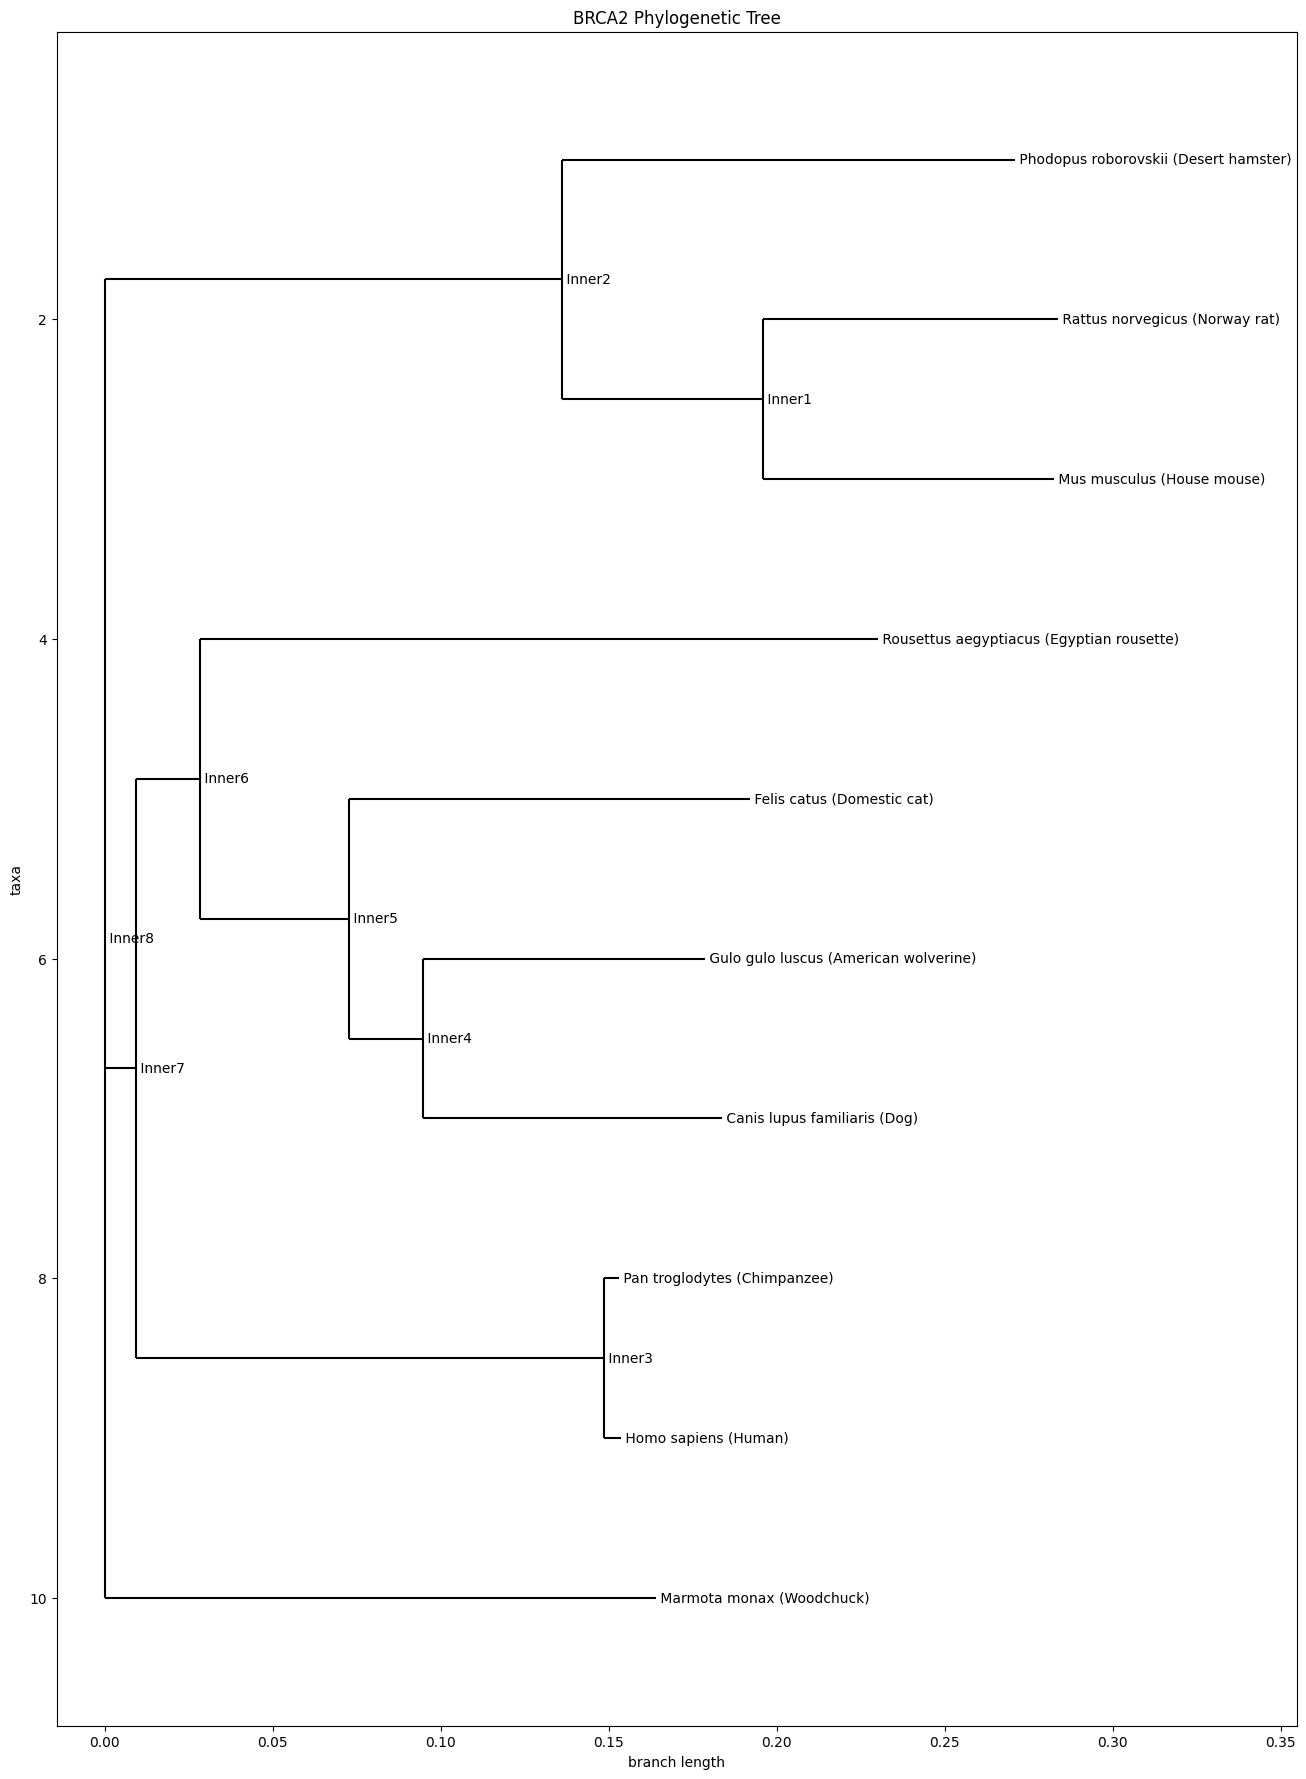

In [100]:
# Read the alignment files
BRCA1_aligned = AlignIO.read("BRCA1_MSA_sequences.fasta", "fasta")
BRCA2_aligned = AlignIO.read("BRCA2_MSA_sequences.fasta", "fasta")

# Calculate distance matrices
calculator = DistanceCalculator('identity')
BRCA1_distancematrix = calculator.get_distance(BRCA1_aligned)
BRCA2_distancematrix = calculator.get_distance(BRCA2_aligned)

# Create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()

# Build neighbor-joining trees
BRCA1_tree = constructor.nj(BRCA1_distancematrix)
BRCA2_tree = constructor.nj(BRCA2_distancematrix)

# Root the trees if needed
BRCA1_tree.rooted = True
BRCA2_tree.rooted = True

# Define dictionaries for species names
BRCA1_seq_id_to_species = {
    'AAC36493.1': 'Rattus norvegicus (Norway rat)',
    'AAC37594.1': 'Homo sapiens (Human)',
    'AAC48663.1': 'Canis lupus familiaris (Dog)',
    'AAR04849.1': 'Pan troglodytes (Chimpanzee)',
    'AAD00168.1': 'Mus musculus (House mouse)',
    'Q6J6I9': 'Macaca mulatta (Rhesus monkey)', 
    'CAH6776192.1': 'Phodopus roborovskii (Desert hamster)',
    'AAT44835.1': 'Gorilla gorilla (Western gorilla)',
    'AAT44834.1': 'Pongo pygmaeus (Bornean orangutan)',
    'AAL76094.1': 'Bos taurus (cattle)'
}

BRCA2_seq_id_to_species = {
    'AAC23702.1': 'Mus musculus (House mouse)',
    'CAA64484.1': 'Homo sapiens (Human)',
    'BAB91245.3': 'Canis lupus familiaris (Dog)',
    'KAI6069156.1': 'Marmota monax (Woodchuck)',
    'KAI5760533.1': 'Gulo gulo luscus (American wolverine)',
    'CAH7276384.1': 'Phodopus roborovskii (Desert hamster)', 
    'AAB71378.1': 'Rattus norvegicus (Norway rat)',
    'NP_001009858.1': 'Felis catus (Domestic cat)',
    'PNI60432.1': 'Pan troglodytes (Chimpanzee)',
    'KAF6427219.1': 'Rousettus aegyptiacus (Egyptian rousette)'
}

# Function to get species names for tree labels
def get_species_name(record_id, species_dict):
    # Extract the accession number (e.g., Q6J6I9) from the full identifier
    accession_number = record_id.split('|')[1] if '|' in record_id else record_id
    return species_dict.get(accession_number, accession_number)  # Return species name or ID if not found

# Update tree visualization for BRCA1
fig = plt.figure(figsize=(16, 22))
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(BRCA1_tree, label_func=lambda x: get_species_name(x.name, BRCA1_seq_id_to_species), do_show=False, axes=axes)
plt.title("BRCA1 Phylogenetic Tree")
plt.savefig('phylogenetic_tree_BRCA1.png')

# Update tree visualization for BRCA2
fig = plt.figure(figsize=(16, 22))
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(BRCA2_tree, label_func=lambda x: get_species_name(x.name, BRCA2_seq_id_to_species), do_show=False, axes=axes)
plt.title("BRCA2 Phylogenetic Tree")
plt.savefig('phylogenetic_tree_BRCA2.png')

# Display trees in ASCII format
print("BRCA1 Phylogenetic Tree:")
Phylo.draw_ascii(BRCA1_tree)

print("\nBRCA2 Phylogenetic Tree:")
Phylo.draw_ascii(BRCA2_tree)

### Identifying CDD Domains for BRCA1

In [107]:
def fetch_protein_sequence(sequence_id, email):
    Entrez.email = email
    handle = Entrez.efetch(db="protein", id=sequence_id, rettype="fasta", retmode="text")
    sequence = handle.read()
    return sequence

def search_cdd(sequence_id, email):
    Entrez.email = email
    handle = Entrez.efetch(db="protein", id=sequence_id, rettype="gp", retmode="xml")
    record = Entrez.read(handle)
    return record

def print_cdd_domains(record, f):
    # This function extracts and prints CDD domains from the GenPept record
    for feature in record[0]['GBSeq_feature-table']:
        if feature['GBFeature_key'] == 'Region':
            for qual in feature['GBFeature_quals']:
                if qual['GBQualifier_name'] == 'region_name':
                    f.write(f"Domain: {qual['GBQualifier_value']}\n")
                if qual['GBQualifier_name'] == 'region':
                    f.write(f"Region: {qual['GBQualifier_value']}\n")
    f.write("\n")

def save_results_to_file(filename, sequences, email):
    with open(filename, 'w') as f:
        for seq_id in sequences:
            protein_sequence = fetch_protein_sequence(seq_id, email)
            f.write(f"Protein Sequence for {seq_id}:\n{protein_sequence}\n\n")
            
            cdd_record = search_cdd(seq_id, email)
            f.write(f"CDD Domains for {seq_id}:\n")
            print_cdd_domains(cdd_record, f)
            f.write("=" * 60 + "\n\n")

def read_sequence_ids(file_path):
    with open(file_path, 'r') as f:
        sequences = [line.strip() for line in f]
    return sequences

# Replace with your own email
email = "khaledmahmoud77@outlook.com"

# Replace with your desired output file name
output_filename = "cdd_results_BRCA1.txt"

# Reading sequence IDs from file
sequence_file_path = "E:/Courses/Bioinformatics Diploma/Introduction to Bioinformatics/Project/BRCA1_seq_id.txt"
sequences = read_sequence_ids(sequence_file_path)

# Save results to file
save_results_to_file(output_filename, sequences, email)

print(f"Results saved to {output_filename}")

Results saved to cdd_results_BRCA1.txt


### Identifying CDD Domains for BRCA2

In [108]:

# Replace with your own email
email = "khaledmahmoud77@outlook.com"

# Replace with your desired output file name
output_filename = "cdd_results_BRCA2.txt"

# Reading sequence IDs from file
sequence_file_path = "E:/Courses/Bioinformatics Diploma/Introduction to Bioinformatics/Project/BRCA2_seq_id.txt"
sequences = read_sequence_ids(sequence_file_path)

# Save results to file
save_results_to_file(output_filename, sequences, email)

print(f"Results saved to {output_filename}")

Results saved to cdd_results_BRCA2.txt


## EXTRA for Visualization 

### Pairwise alignments heatmap for BRCA1 & 2

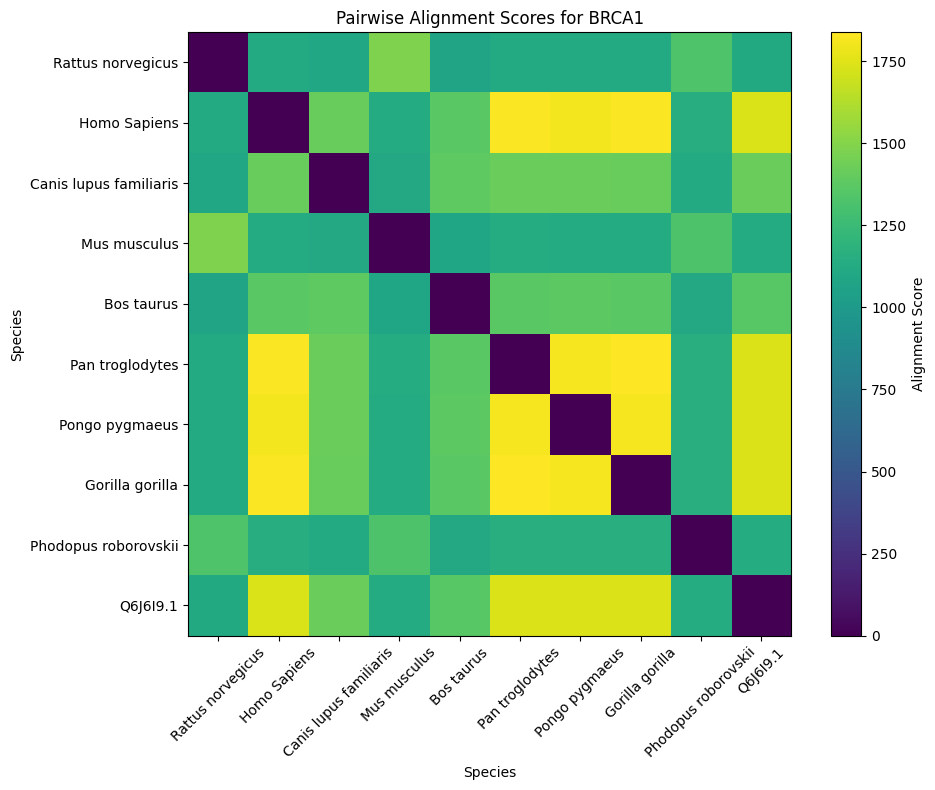

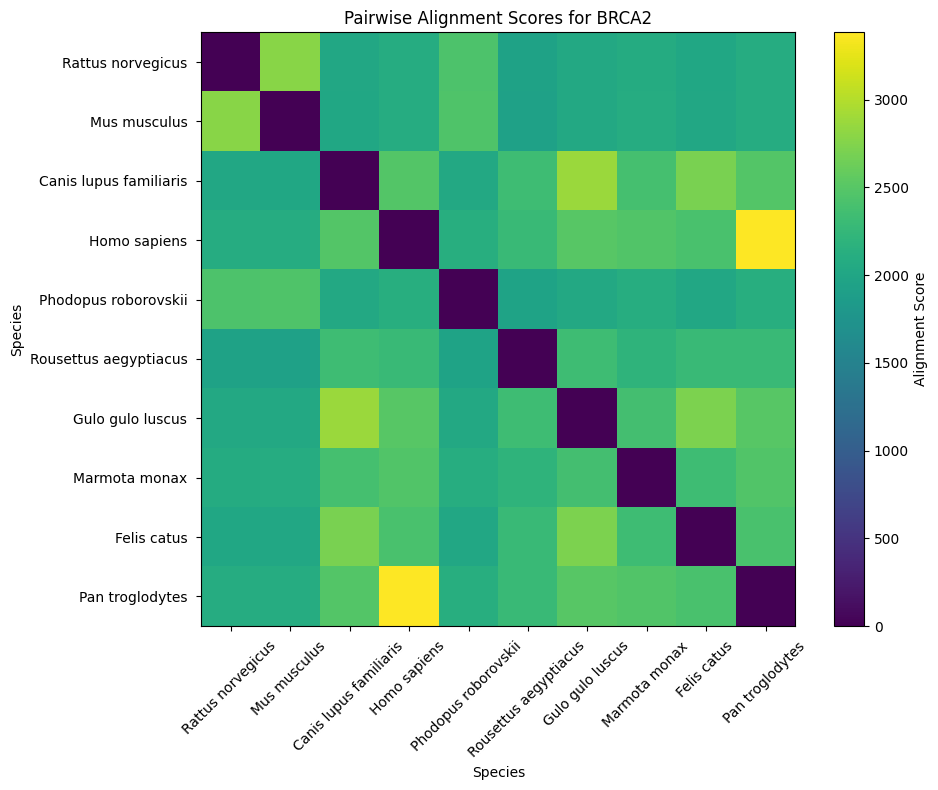

Heatmap for BRCA1 saved to BRCA1_pairwise_alignments_heatmap.png
Heatmap for BRCA2 saved to BRCA2_pairwise_alignments_heatmap.png


In [109]:
# Function to create a heatmap of alignment scores
def create_heatmap(alignments, id_to_species, dataset_name, save_path):
    seq_ids = set()
    for align in alignments:
        seq_ids.add(align[0])
        seq_ids.add(align[1])
    seq_ids = sorted(list(seq_ids))
    
    num_seqs = len(seq_ids)
    score_matrix = np.zeros((num_seqs, num_seqs))
    
    # Fill score matrix with alignment scores
    for align in alignments:
        seq1_idx = seq_ids.index(align[0])
        seq2_idx = seq_ids.index(align[1])
        score_matrix[seq1_idx, seq2_idx] = align[2]
        score_matrix[seq2_idx, seq1_idx] = align[2]  # Make it symmetric
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(score_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Alignment Score')
    plt.xticks(np.arange(num_seqs), [get_species_name(seq_id, id_to_species) for seq_id in seq_ids], rotation=45)
    plt.yticks(np.arange(num_seqs), [get_species_name(seq_id, id_to_species) for seq_id in seq_ids])
    plt.title(f'Pairwise Alignment Scores for {dataset_name}')
    plt.xlabel('Species')
    plt.ylabel('Species')
    plt.tight_layout()
    
    # Save the plot as an image file
    plt.savefig(save_path)
    plt.show()

# Function to get species names for sequence IDs
def get_species_name(seq_id, id_to_species):
    # Extract the accession number from the sequence ID
    if '|' in seq_id:
        accession_number = seq_id.split('|')[1]
    else:
        accession_number = seq_id
    return id_to_species.get(accession_number, accession_number)  # Return species name or ID if not found

# Path to your pairwise alignment results file for BRCA1 and BRCA2
alignment_results_file_BRCA1 = 'pairwise_alignments_BRCA1.txt'
alignment_results_file_BRCA2 = 'pairwise_alignments_BRCA2.txt'


# Path to save the heatmap images
heatmap_save_path_BRCA1 = 'BRCA1_pairwise_alignments_heatmap.png'
heatmap_save_path_BRCA2 = 'BRCA2_pairwise_alignments_heatmap.png'

# Read alignment scores from file for BRCA1 and BRCA2
alignment_scores_BRCA1 = read_alignment_scores(alignment_results_file_BRCA1)
alignment_scores_BRCA2 = read_alignment_scores(alignment_results_file_BRCA2)

# Create heatmap of alignment scores for BRCA1
create_heatmap(alignment_scores_BRCA1, BRCA1_seq_id_to_species, 'BRCA1', heatmap_save_path_BRCA1)

# Create heatmap of alignment scores for BRCA2
create_heatmap(alignment_scores_BRCA2, BRCA2_seq_id_to_species, 'BRCA2', heatmap_save_path_BRCA2)

print(f"Heatmap for BRCA1 saved to {heatmap_save_path_BRCA1}")
print(f"Heatmap for BRCA2 saved to {heatmap_save_path_BRCA2}")

### Alignment Scores of BRCA1 Sequences Across Various Species

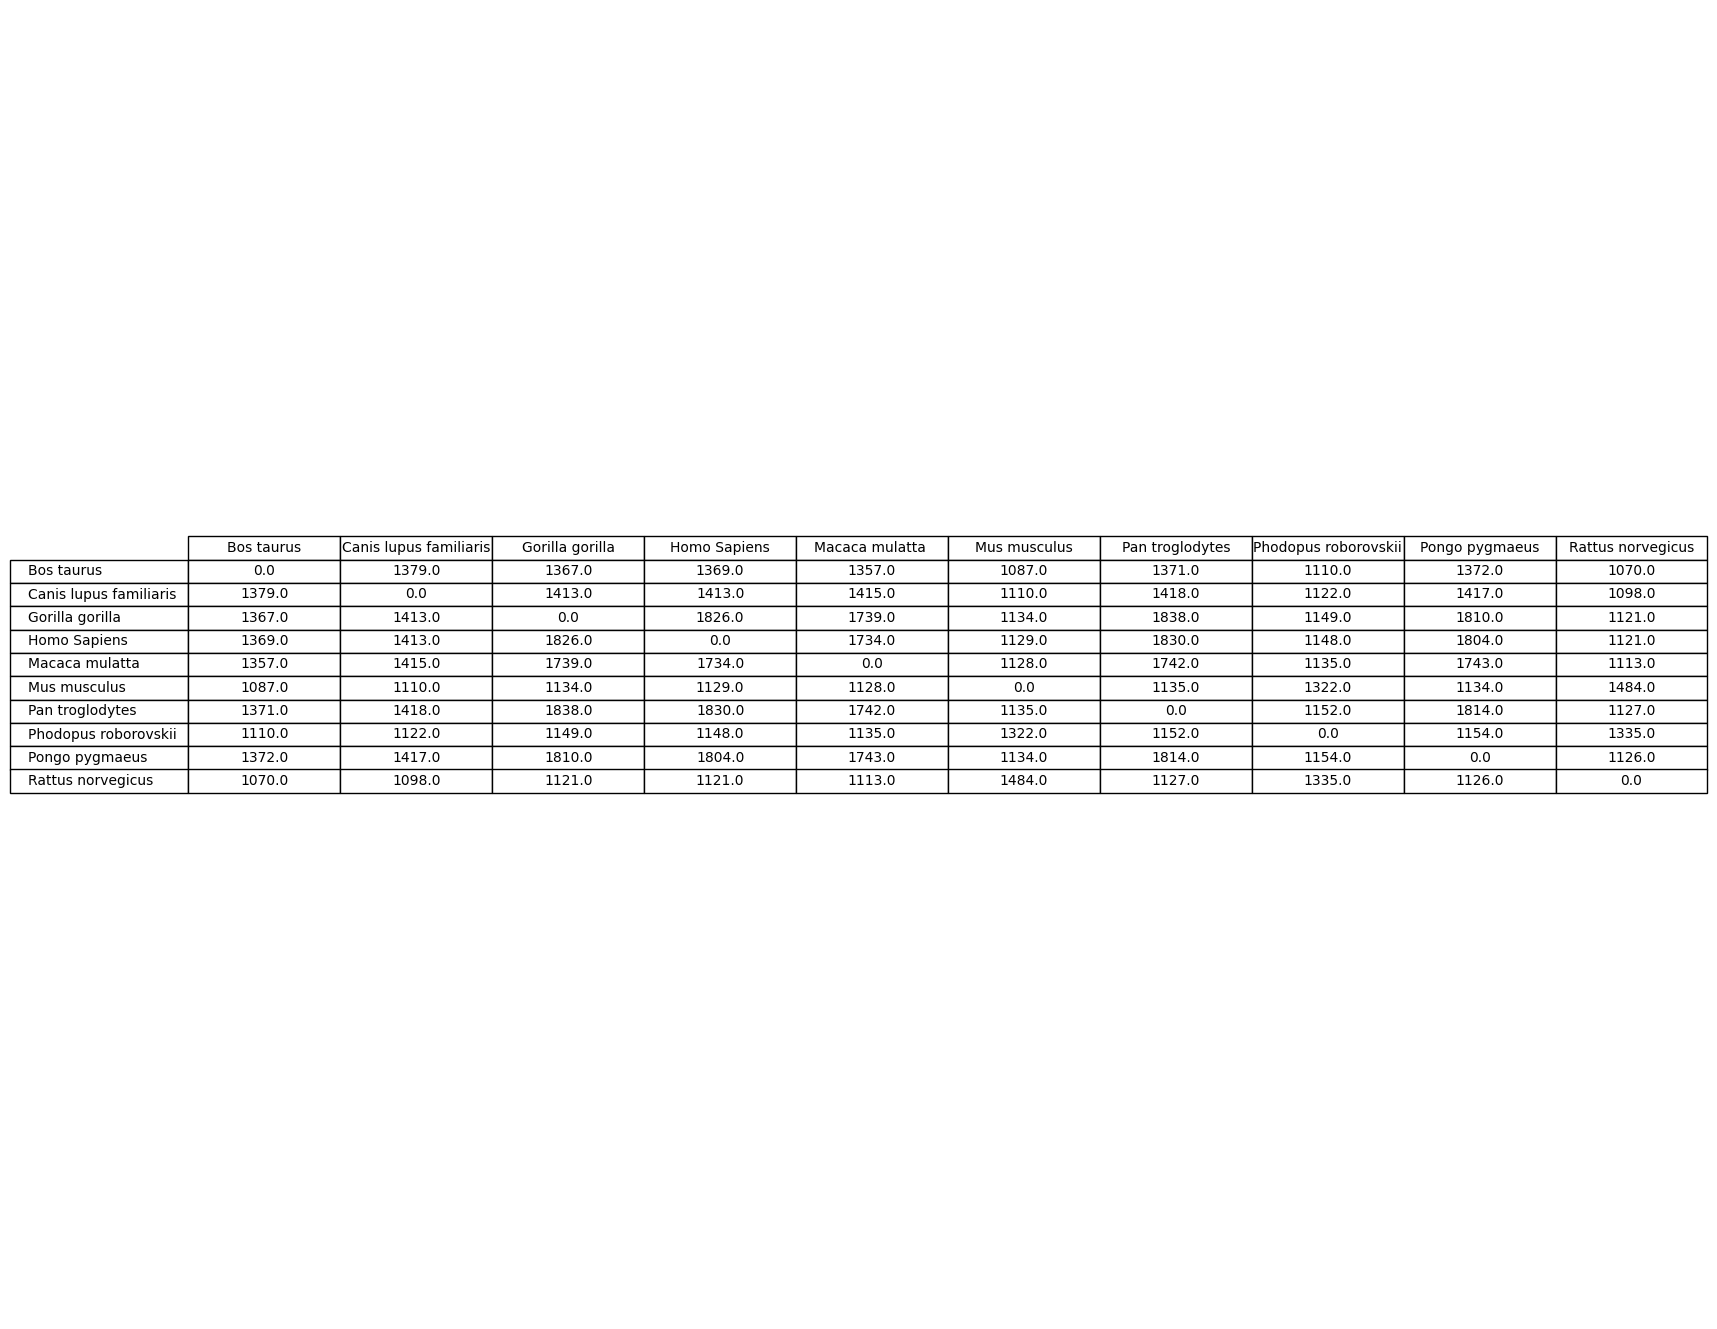

Table saved to BRCA1_alignment_scores_table_species.png


In [110]:
# Function to read alignment scores from file
def read_alignment_scores(file_path):
    alignments = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            if line.startswith("Alignment between"):
                parts = line.split()
                seq1_id = parts[2]
                seq2_id = parts[4][:-1]  # Remove trailing colon
            elif line.startswith("Score="):
                score = int(line.split("=")[1].strip())
                alignments.append((seq1_id, seq2_id, score))
    return alignments

# Path to your pairwise alignment results file
alignment_results_file = 'pairwise_alignments_BRCA1.txt'

# Read alignment scores from file
alignment_scores = read_alignment_scores(alignment_results_file)

# Create a DataFrame from the alignment scores
df_scores = pd.DataFrame(alignment_scores, columns=["Sequence 1", "Sequence 2", "Alignment Score"])

# Add reverse pairs to make the matrix symmetric
reverse_pairs = [(seq2, seq1, score) for seq1, seq2, score in alignment_scores]
df_scores = pd.concat([df_scores, pd.DataFrame(reverse_pairs, columns=["Sequence 1", "Sequence 2", "Alignment Score"])])

# Mapping from sequence IDs to species names
BRCA1_seq_id_to_species = {
    'AAC36493.1': 'Rattus norvegicus',
    'AAC37594.1': 'Homo Sapiens',
    'AAC48663.1': 'Canis lupus familiaris',
    'AAR04849.1': 'Pan troglodytes',
    'AAD00168.1': 'Mus musculus',
    'sp|Q6J6I9.1|BRCA1_MACMU': 'Macaca mulatta ', 
    'CAH6776192.1': 'Phodopus roborovskii',
    'AAT44835.1': 'Gorilla gorilla',
    'AAT44834.1': 'Pongo pygmaeus',
    'AAL76094.1': 'Bos taurus'
}

# Replace sequence IDs with species names in the DataFrame for visualization
df_scores_visualization = df_scores.replace({'Sequence 1': seq_id_to_species, 'Sequence 2': seq_id_to_species})

# Create a pivot table
score_matrix = df_scores_visualization.pivot(index="Sequence 1", columns="Sequence 2", values="Alignment Score")

# Fill diagonal with 0 (self-alignment scores)
for seq in score_matrix.index:
    score_matrix.at[seq, seq] = 0

# Fill NaN values with 0 for a complete matrix
score_matrix = score_matrix.fillna(0)

# Plot the table
fig, ax = plt.subplots(figsize=(14, 17))  # Adjust the figure size as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=score_matrix.values,
                 rowLabels=score_matrix.index,
                 colLabels=score_matrix.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.4, 1.4)  # Adjust table scale

# Save the table as an image
table_image_path = 'BRCA1_alignment_scores_table_species.png'
plt.savefig(table_image_path, bbox_inches='tight')
plt.show()

print(f"Table saved to {table_image_path}")

### Alignment Scores of BRCA2 Sequences Across Various Species

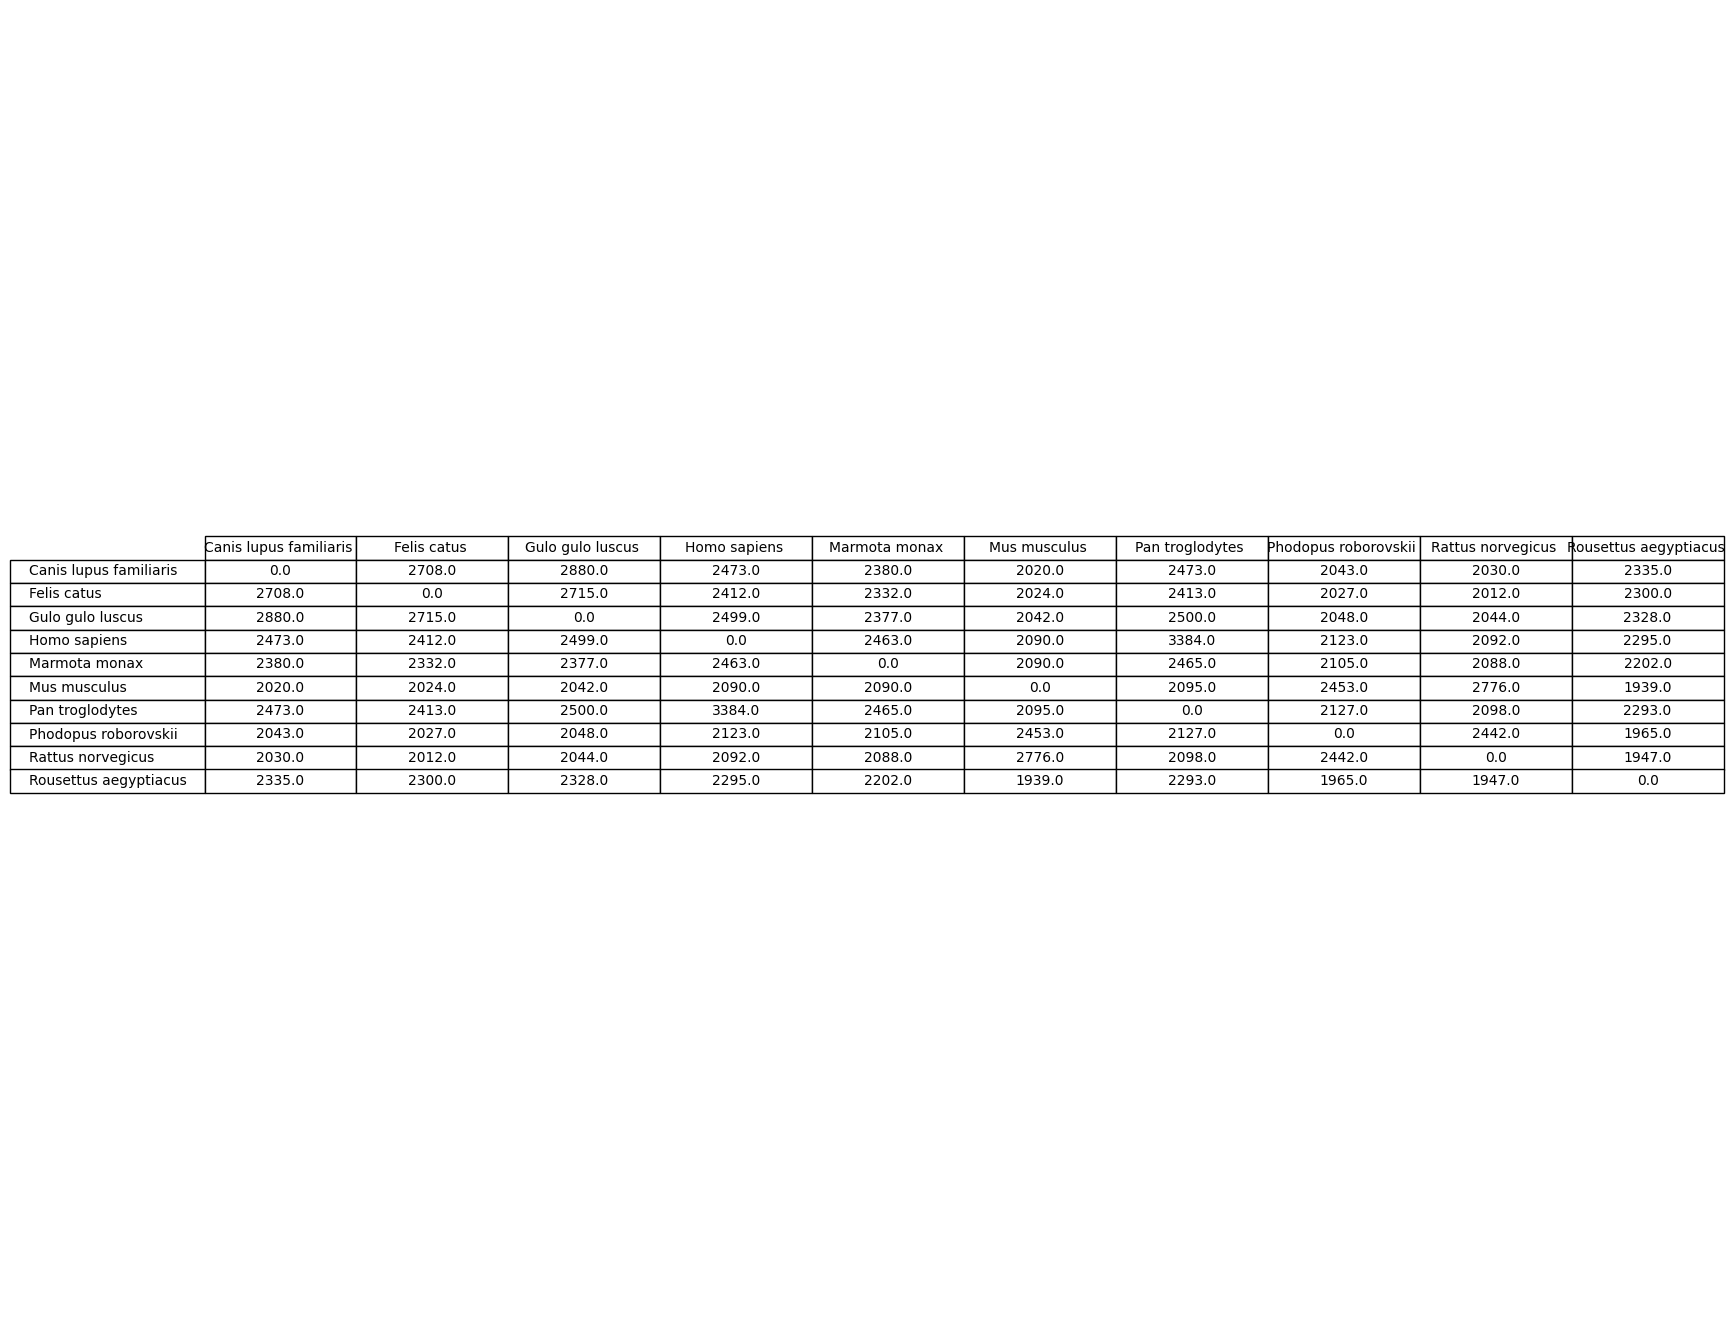

Table saved to BRCA2_alignment_scores_table_species.png


In [111]:
# Path to your pairwise alignment results file for BRCA2
alignment_results_file = 'pairwise_alignments_BRCA2.txt'

# Read alignment scores from file
alignment_scores = read_alignment_scores(alignment_results_file)

# Create a DataFrame from the alignment scores
df_scores = pd.DataFrame(alignment_scores, columns=["Sequence 1", "Sequence 2", "Alignment Score"])

# Add reverse pairs to make the matrix symmetric
reverse_pairs = [(seq2, seq1, score) for seq1, seq2, score in alignment_scores]
df_scores = pd.concat([df_scores, pd.DataFrame(reverse_pairs, columns=["Sequence 1", "Sequence 2", "Alignment Score"])])

# Mapping from sequence IDs to species names for BRCA2
BRCA2_seq_id_to_species =  {
    'AAC23702.1': 'Mus musculus ',
    'CAA64484.1': 'Homo sapiens ',
    'BAB91245.3': 'Canis lupus familiaris ',
    'KAI6069156.1': 'Marmota monax ',
    'KAI5760533.1': 'Gulo gulo luscus ',
    'CAH7276384.1': 'Phodopus roborovskii ', 
    'AAB71378.1': 'Rattus norvegicus ',
    'NP_001009858.1': 'Felis catus ',
    'PNI60432.1': 'Pan troglodytes ',
    'KAF6427219.1': 'Rousettus aegyptiacus '
}

# Replace sequence IDs with species names in the DataFrame for visualization
df_scores_visualization = df_scores.replace({'Sequence 1': BRCA2_seq_id_to_species, 'Sequence 2': BRCA2_seq_id_to_species})

# Create a pivot table
score_matrix = df_scores_visualization.pivot(index="Sequence 1", columns="Sequence 2", values="Alignment Score")

# Fill diagonal with 0 (self-alignment scores)
for seq in score_matrix.index:
    score_matrix.at[seq, seq] = 0

# Fill NaN values with 0 for a complete matrix
score_matrix = score_matrix.fillna(0)

# Plot the table
fig, ax = plt.subplots(figsize=(14, 17))  # Adjust the figure size as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=score_matrix.values,
                 rowLabels=score_matrix.index,
                 colLabels=score_matrix.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.4, 1.4)  # Adjust table scale

# Save the table as an image
table_image_path = 'BRCA2_alignment_scores_table_species.png'
plt.savefig(table_image_path, bbox_inches='tight')
plt.show()

print(f"Table saved to {table_image_path}")